# Web Scraping vaccination data from 

"https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=&"

Checking the Status code for each dates from the above link

In [28]:
#https://docs.python.org/3/library/datetime.html

import datetime as datetime

import requests
import json
def extract_data(start, end):
    while start <= end:        
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)
    
counter=0
if __name__ == '__main__':
    for a in extract_data(datetime.date(2021, 1, 1), datetime.date.today()):
        counter=counter+1
        print(counter)
        print(a.status_code)

1
400
2
400
3
400
4
400
5
400
6
400
7
400
8
400
9
400
10
400
11
400
12
400
13
400
14
400
15
400
16
400
17
400
18
400
19
400
20
400
21
400
22
400
23
400
24
400
25
400
26
400
27
400
28
400
29
400
30
400
31
400
32
400
33
400
34
400
35
400
36
400
37
400
38
400
39
400
40
400
41
400
42
400
43
400
44
400
45
400
46
400
47
400
48
400
49
400
50
400
51
400
52
400
53
400
54
400
55
400
56
400
57
400
58
400
59
400
60
400
61
400
62
400
63
400
64
400
65
400
66
400
67
200
68
200
69
200
70
200
71
200
72
200
73
200
74
200
75
200
76
200
77
200
78
200
79
200
80
200
81
200
82
200
83
200
84
200
85
200
86
200
87
200
88
200
89
200
90
200
91
200
92
200
93
200
94
200
95
200
96
200
97
200
98
200
99
200
100
200
101
200
102
200
103
200
104
200
105
200
106
200
107
200
108
200
109
200
110
200
111
200
112
200
113
200
114
200
115
200
116
200
117
200
118
200
119
200
120
200
121
200
122
200
123
200
124
200
125
200
126
200
127
200
128
200
129
200
130
200
131
200
132
200
133
200
134
200
135
200
136
200
137
200
138
200
139


# Extracting Vaccination Data, Vaccination sites and number of sesssion data from the api link (Only available from 08-03-2021)

In [29]:
import datetime as datetime
from datetime import timedelta

import requests
import json

import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression

In [30]:

vaccine_data2=[]
vaccine_data_by_age2=[]
vaccine_sites2=[]
vaccine_sessions2=[]

def extract_data(start, end):
    while start<= end:
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_data1=r['topBlock']['vaccination'] #08March onwards data is there in the API
        vaccine_data2.append(vaccine_data1) #Storing the vaccine_0date in a list
        vaccine_sites1=r['topBlock']['sites'] #08March onwards data is there in the API
        vaccine_sites2.append(vaccine_sites1) #Storing the vaccine sites data in a list
        vaccine_sessions1=r['topBlock']['sessions'] #08March onwards data is there in the API
        vaccine_sessions2.append(vaccine_sessions1) #Storing the vaccine sessions in a list
        

In [31]:
vaccine_dataframe1=pd.DataFrame(vaccine_data2) # Converting into a dataframe

In [32]:
#replacing Not-a-Number value to 0

vaccine_dataframe1 = vaccine_dataframe1.replace(np.NaN, 0)
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1013378089,522842840,486129798,226323,892727606,115416225,6806936,713991900.0,299386189.0,1.013378e+09,...,2876801.0,3930135.0,3331411.0,3473868.0,1657.0,136.0,1055130.0,6114208.0,2606490.0,3507718.0
229,1021354307,526724100,490222899,228180,899918017,116197164,7694178,717294872.0,304059435.0,1.021354e+09,...,3168857.0,4525321.0,3744422.0,3947954.0,1801.0,78.0,1059998.0,6835950.0,2892434.0,3943516.0
230,1023078367,527582147,491088512,228580,901482650,116354757,1220618,718074024.0,305004343.0,1.023078e+09,...,547586.0,673032.0,615594.0,604741.0,283.0,11.0,1061832.0,7727025.0,3185665.0,4541360.0
231,1029608352,530752587,494446438,230199,907334202,117030380,6432929,720708246.0,308900106.0,1.029608e+09,...,2582881.0,3850048.0,3122273.0,3309057.0,1599.0,123.0,1064642.0,1227700.0,551694.0,676006.0


#Creating the dates column to be added to the dataframe 

In [33]:
#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
#https://docs.python.org/3/library/datetime.html

# The following code is done to add dates to our dataframe

start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [34]:
dates_vaccine

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26'],
              dtype='datetime64[ns]', length=233, freq='D')

In [35]:
dates_vaccine.shape

(233,)

In [36]:
#Adding the date column
vaccine_dataframe1['dates_vaccine']=dates_vaccine 

In [37]:
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1013378089,522842840,486129798,226323,892727606,115416225,6806936,713991900.0,299386189.0,1.013378e+09,...,3930135.0,3331411.0,3473868.0,1657.0,136.0,1055130.0,6114208.0,2606490.0,3507718.0,2021-10-22
229,1021354307,526724100,490222899,228180,899918017,116197164,7694178,717294872.0,304059435.0,1.021354e+09,...,4525321.0,3744422.0,3947954.0,1801.0,78.0,1059998.0,6835950.0,2892434.0,3943516.0,2021-10-23
230,1023078367,527582147,491088512,228580,901482650,116354757,1220618,718074024.0,305004343.0,1.023078e+09,...,673032.0,615594.0,604741.0,283.0,11.0,1061832.0,7727025.0,3185665.0,4541360.0,2021-10-24
231,1029608352,530752587,494446438,230199,907334202,117030380,6432929,720708246.0,308900106.0,1.029608e+09,...,3850048.0,3122273.0,3309057.0,1599.0,123.0,1064642.0,1227700.0,551694.0,676006.0,2021-10-25


In [38]:
vaccine_dataframe1.insert(0, 'date_index', np.arange(0, len(vaccine_dataframe1)))

In [39]:
#Removing the last row because it has incomplete data

vaccine_dataframe = vaccine_dataframe1[:-1]
vaccine_dataframe.set_index('date_index')

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
date_index,,,,,,,,,,,,,,,,,,,,,
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1006233421,519347264,482482436,224593,886297584,114704833,6089572,710957570.0,295275851.0,1.006233e+09,...,3495943.0,2994387.0,3093737.0,1448.0,88.0,1051876.0,4462754.0,1880116.0,2582638.0,2021-10-21
228,1013378089,522842840,486129798,226323,892727606,115416225,6806936,713991900.0,299386189.0,1.013378e+09,...,3930135.0,3331411.0,3473868.0,1657.0,136.0,1055130.0,6114208.0,2606490.0,3507718.0,2021-10-22
229,1021354307,526724100,490222899,228180,899918017,116197164,7694178,717294872.0,304059435.0,1.021354e+09,...,4525321.0,3744422.0,3947954.0,1801.0,78.0,1059998.0,6835950.0,2892434.0,3943516.0,2021-10-23


In [42]:
#Storing the resultant dataframe into a csv file.
vaccine_dataframe.to_csv('vaccine_dataframe.csv')
vaccine_dataframe_excel = vaccine_dataframe.to_excel('vaccine_dataframe.xlsx')

<AxesSubplot:>

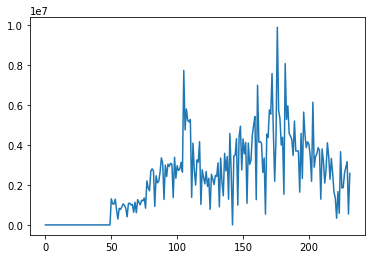

In [43]:
vaccine_dataframe['today_dose_one'].plot()

In [44]:
vaccine_dataframe = vaccine_dataframe.replace(np.NaN, 0)
vaccine_dataframe

,date_index,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,227,1006233421,519347264,482482436,224593,886297584,114704833,6089572,710957570.0,295275851.0,...,3495943.0,2994387.0,3093737.0,1448.0,88.0,1051876.0,4462754.0,1880116.0,2582638.0,2021-10-21
228,228,1013378089,522842840,486129798,226323,892727606,115416225,6806936,713991900.0,299386189.0,...,3930135.0,3331411.0,3473868.0,1657.0,136.0,1055130.0,6114208.0,2606490.0,3507718.0,2021-10-22
229,229,1021354307,526724100,490222899,228180,899918017,116197164,7694178,717294872.0,304059435.0,...,4525321.0,3744422.0,3947954.0,1801.0,78.0,1059998.0,6835950.0,2892434.0,3943516.0,2021-10-23
230,230,1023078367,527582147,491088512,228580,901482650,116354757,1220618,718074024.0,305004343.0,...,673032.0,615594.0,604741.0,283.0,11.0,1061832.0,7727025.0,3185665.0,4541360.0,2021-10-24


<AxesSubplot:>

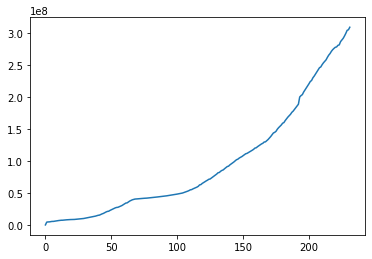

In [45]:
vaccine_dataframe['tot_dose_2'].plot()

<AxesSubplot:>

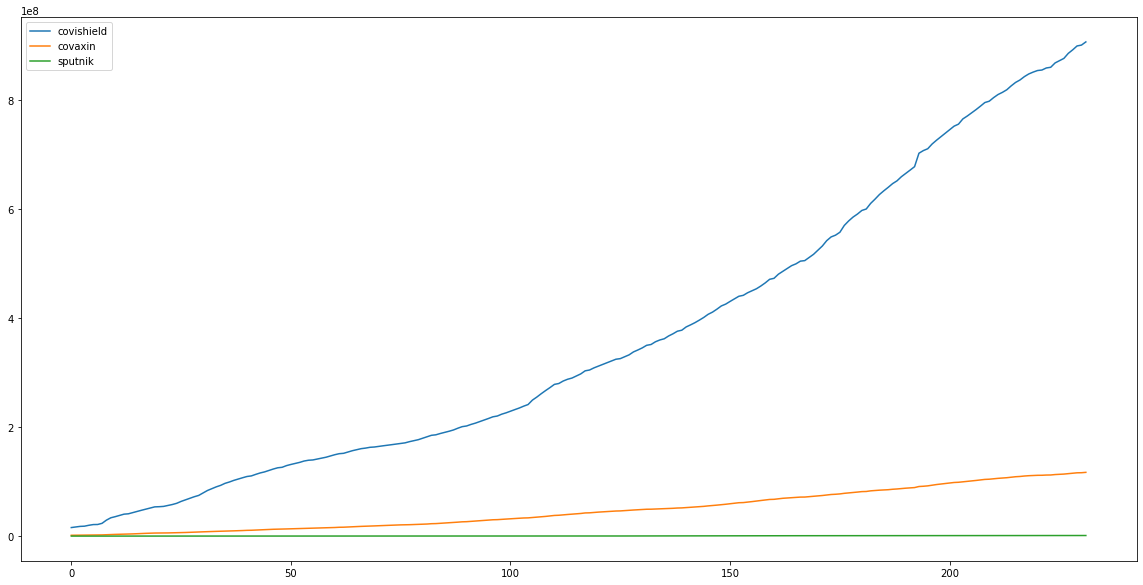

In [46]:
vaccine_dataframe[['covishield','covaxin','sputnik']].plot(figsize = (20,10))

In [47]:
first_c = vaccine_dataframe.pop('dates_vaccine')
vaccine_dataframe.insert(1, 'dates_vaccine', first_c)
#vaccine_dataframe.set_index('date_index')

<AxesSubplot:>

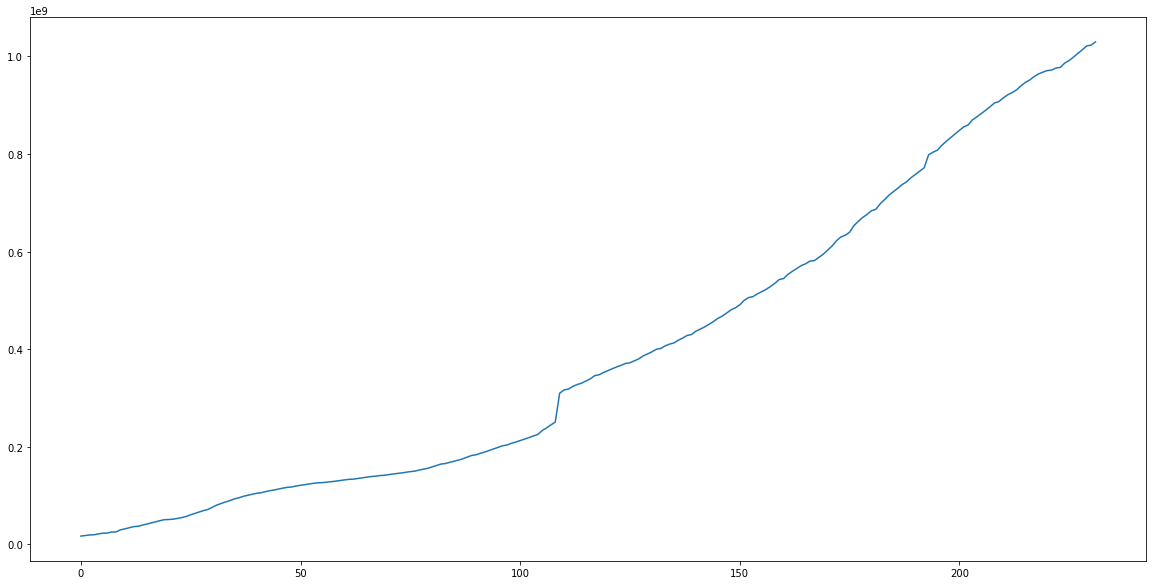

In [48]:
vaccine_dataframe['total'].plot(figsize = (20,10))

In [49]:
X = vaccine_dataframe[['tot_dose_2']]
y = vaccine_dataframe[['date_index']]

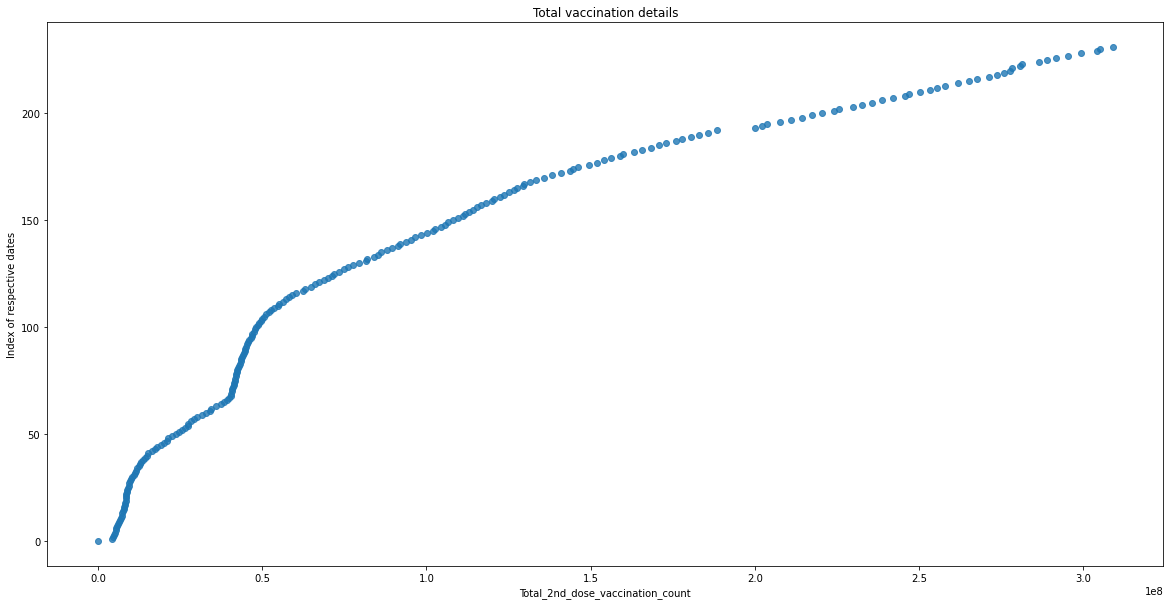

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.8)
plt.title('Total vaccination details')
plt.xlabel('Total_2nd_dose_vaccination_count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [51]:
y.shape


(232, 1)

In [52]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [53]:
m = regression.coef_  
m = float(m)
m

7.315343125449792e-07

In [54]:
c = regression.intercept_
c = float(c)
c

45.46489301594313

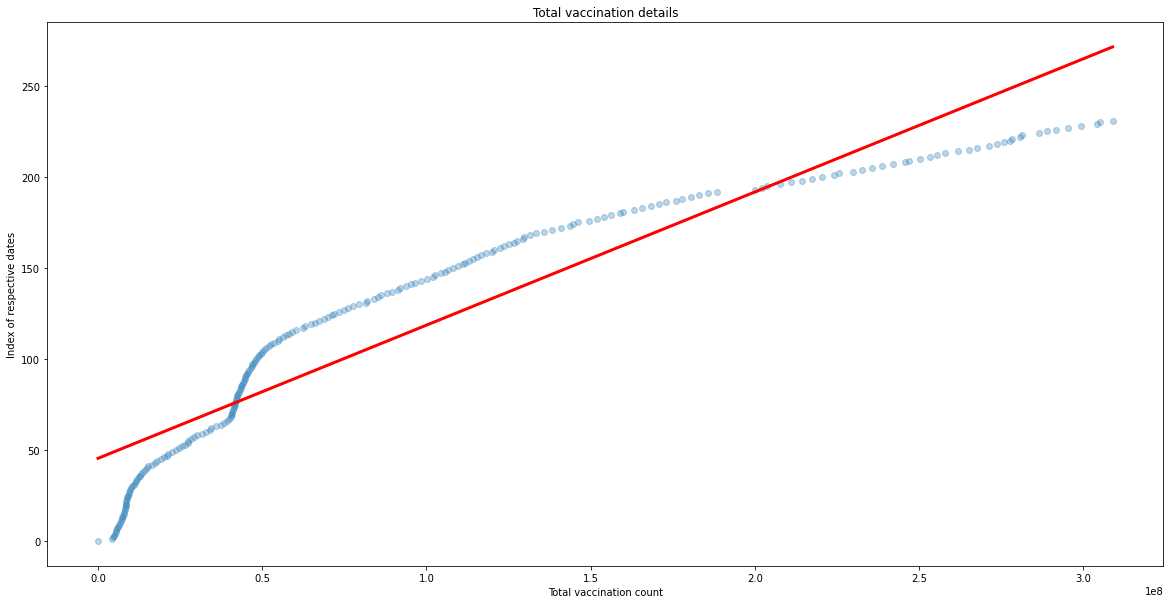

In [55]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)


plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [56]:
regression.score(X, y)

0.8790710734032356

In [42]:
# mathematical formula for prediction 
# For Linear model:  y = mx + c (y = date_index, x = population of India, m = slop, c = intercept)
# x = 1,402,000,000

In [57]:
x0 = 1397813633

In [58]:
y0 = (m*x0) + c

In [59]:
y0

1068.0135280985978

In [60]:
#Date for fully vaccination
fully_vaccination_date = start_date + timedelta(y0)
fully_vaccination_date

datetime.date(2024, 2, 9)

In [ ]:
# For all of the next dataframes the same step I have repeated.

# Vaccine Sites Data

In [60]:

vaccine_sites=pd.DataFrame(vaccine_sites2)

In [61]:
vaccine_sites.replace(np.NaN, 0)

,total,govt,pvt,today
0,29731,25020,4711,0
1,22562,17827,4735,0
2,22885,17951,4934,0
3,13920,9738,4182,0
4,34489,29076,5413,0
...,...,...,...,...
218,75116,72507,2609,0
219,64856,62323,2533,0
220,60903,58498,2405,0
221,31677,29929,1748,0


In [318]:
vaccine_sites['dates_vaccine']=dates_vaccine

In [62]:
vaccine_sites.replace(np.NaN, 0)

,total,govt,pvt,today
0,29731,25020,4711,0
1,22562,17827,4735,0
2,22885,17951,4934,0
3,13920,9738,4182,0
4,34489,29076,5413,0
...,...,...,...,...
218,75116,72507,2609,0
219,64856,62323,2533,0
220,60903,58498,2405,0
221,31677,29929,1748,0


In [332]:
vaccine_sites.replace(np.NaN, 0).to_csv('vaccine_sites.csv')

# Vaccine Sessions Data

In [58]:
#Vaccine sessions
vaccine_sessions=pd.DataFrame(vaccine_sessions2)

In [59]:
vaccine_sessions.replace(np.NaN, 0)

,total,govt,pvt,today
0,4951076,4280989,670087,0
1,3632230,2970087,662143,0
2,3712590,3016231,696359,0
3,2074307,1494552,579755,0
4,5428928,4661673,767255,0
...,...,...,...,...
218,54267281,53119111,1148170,0
219,47696819,46606468,1090351,0
220,43964359,42908655,1055704,0
221,27392070,26661954,730116,0


In [322]:
vaccine_sessions['dates_vaccine']=dates_vaccine

In [63]:
vaccine_sessions.replace(np.NaN, 0)

,total,govt,pvt,today
0,4951076,4280989,670087,0
1,3632230,2970087,662143,0
2,3712590,3016231,696359,0
3,2074307,1494552,579755,0
4,5428928,4661673,767255,0
...,...,...,...,...
218,54267281,53119111,1148170,0
219,47696819,46606468,1090351,0
220,43964359,42908655,1055704,0
221,27392070,26661954,730116,0


In [333]:
vaccine_sessions.replace(np.NaN, 0).to_csv('vaccine_sessions.csv')

# Vaccination Data By Age (only available in the link from 22-03-2021)


In [42]:
vaccine_data_by_age2=[]

def extract_data(start, end):
    while start <= end:
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    for r in extract_data(datetime.date(2021, 3, 22), datetime.date.today()):
        r=r.json()
        vaccine_data_by_age1=r['vaccinationByAge'] #Data from 22 March is available
        vaccine_data_by_age2.append(vaccine_data_by_age1)
        

In [43]:
vaccination_by_age=pd.DataFrame(vaccine_data_by_age2)

In [52]:
#vaccination_by_age
vaccination_by_age.replace(np.NaN, 0)

,total,vac_18_25,vac_25_40,vac_40_60,above_60,vac_18_30,vac_30_45,vac_45_60,vac_18_45,dates_vaccine
0,39612614,1487768.0,7026408.0,11542500.0,19538350,0.0,0.0,0.0,0.0,2021-03-22
1,42148875,1517626.0,7139637.0,12235178.0,21238556,0.0,0.0,0.0,0.0,2021-03-23
2,44250191,1540577.0,7229462.0,12809134.0,22652955,0.0,0.0,0.0,0.0,2021-03-24
3,46454700,1565903.0,7329935.0,13438961.0,24101658,0.0,0.0,0.0,0.0,2021-03-25
4,48749313,1593134.0,7437574.0,14142017.0,25558079,0.0,0.0,0.0,0.0,2021-03-26
...,...,...,...,...,...,...,...,...,...,...
204,960377430,0.0,0.0,0.0,166525544,0.0,0.0,262512981.0,531338905.0,2021-10-12
205,964175264,0.0,0.0,0.0,166971876,0.0,0.0,263280491.0,533922897.0,2021-10-13
206,967408682,0.0,0.0,0.0,167330802,0.0,0.0,263918549.0,536159331.0,2021-10-14
207,968406222,0.0,0.0,0.0,167438707,0.0,0.0,264114096.0,536853419.0,2021-10-15


In [53]:
start_date = datetime.date(2021, 3, 22)   # start date
end_date = datetime.date.today()   # end date
time_diff=end_date-start_date  
dates_vaccine2=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [54]:
vaccination_by_age['dates_vaccine']=dates_vaccine2

In [56]:
#vaccine_dataframe.replace(np.NaN, 0)
vaccination_by_age.replace(np.NaN, 0)

,total,vac_18_25,vac_25_40,vac_40_60,above_60,vac_18_30,vac_30_45,vac_45_60,vac_18_45,dates_vaccine
0,39612614,1487768.0,7026408.0,11542500.0,19538350,0.0,0.0,0.0,0.0,2021-03-22
1,42148875,1517626.0,7139637.0,12235178.0,21238556,0.0,0.0,0.0,0.0,2021-03-23
2,44250191,1540577.0,7229462.0,12809134.0,22652955,0.0,0.0,0.0,0.0,2021-03-24
3,46454700,1565903.0,7329935.0,13438961.0,24101658,0.0,0.0,0.0,0.0,2021-03-25
4,48749313,1593134.0,7437574.0,14142017.0,25558079,0.0,0.0,0.0,0.0,2021-03-26
...,...,...,...,...,...,...,...,...,...,...
204,960377430,0.0,0.0,0.0,166525544,0.0,0.0,262512981.0,531338905.0,2021-10-12
205,964175264,0.0,0.0,0.0,166971876,0.0,0.0,263280491.0,533922897.0,2021-10-13
206,967408682,0.0,0.0,0.0,167330802,0.0,0.0,263918549.0,536159331.0,2021-10-14
207,968406222,0.0,0.0,0.0,167438707,0.0,0.0,264114096.0,536853419.0,2021-10-15


In [57]:
vaccination_by_age.replace(np.NaN, 0).to_csv('vaccination_by_age.csv')

# USING FORMULA TO PREDICT VACCINATION DATE

In [85]:
india_population = 1397813633

<AxesSubplot:>

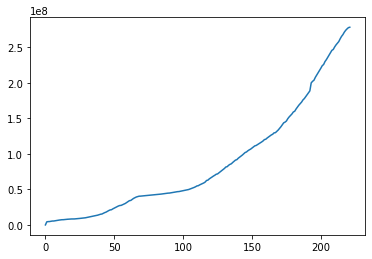

In [69]:
vaccine_dataframe['tot_dose_2'].plot()


<AxesSubplot:>

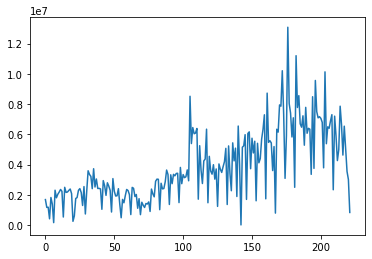

In [70]:
vaccine_dataframe['today'].plot()

In [71]:
vaccine_dataframe.tail(1)

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
221,221,2021-10-15,971854116,502631691,465557429,217102,855713449,111661598,827762,693708667.0,...,335197.0,492565.0,427441.0,400103.0,218.0,18.0,1031175.0,3019927.0,1363788.0,1656139.0


In [77]:
total_vaccinated = int(vaccine_dataframe.tail(1)['tot_dose_2'])
total_vaccinated

278145449

In [114]:
today_vaccinated = int(vaccine_dataframe.tail(1)['today_dose_two'])
today_vaccinated_rate = 1/today_vaccinated
today_vaccinated_rate

2.0301889090779897e-06

In [87]:
#predicted_date = (1/today_vaccinated) * (india_population - total_vaccinated) 
#predicted_date

2273.1379290042937

In [88]:
unvaccinated_population = india_population - total_vaccinated
unvaccinated_population

1119668184

In [116]:
number_of_days_until_comp_vacci = yesterdays_vaccinated_rate * unvaccinated_population
number_of_days_until_comp_vacci

676.0713828972084

In [96]:
datetime.date.today()

datetime.date(2021, 10, 16)

In [113]:
predicted_date = datetime.date.today() + datetime.timedelta(days=number_of_days_until_comp_vacci)
predicted_date

datetime.date(2023, 8, 23)

In [115]:
yesterdays_vaccinated = int(vaccine_dataframe.tail(1)['yesterday_dose_two'])
yesterdays_vaccinated_rate = 1/yesterdays_vaccinated
yesterdays_vaccinated_rate

6.038140518398516e-07

In [118]:
vaccine_dataframe.columns

Index(['date_index', 'dates_vaccine', 'total', 'male', 'female', 'others',
       'covishield', 'covaxin', 'today', 'tot_dose_1', 'tot_dose_2',
       'total_doses', 'vac_18_25', 'vac_25_40', 'vac_40_60', 'above_60',
       'aefi', 'today_dose_one', 'today_dose_two', 'today_male',
       'today_female', 'today_others', 'today_aefi', 'sputnik',
       'yesterday_vac', 'yesterday_dose_one', 'yesterday_dose_two'],
      dtype='object')